### *TAREA M46 - BRYAN ALBERTO CORONADO GARCÍA*


#### *Importación de librerías y datos*

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

# ----------------------------------------------
from pylab import rcParams
from chart_studio import plotly as py
from chart_studio import grid_objs
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error
# ----------------------------------------------

os.chdir('c:/Users/DomesticoRemoto/Desktop')
os.getcwd()

'c:\\Users\\DomesticoRemoto\\Desktop'

---

In [2]:
df_apple = pd.read_csv('Analista de datos AAPL_2006-01-01_to_2018-01-01_M30.csv', index_col = 'Date', parse_dates=['Date'])

In [3]:
df_google = pd.read_csv('Analista de datos GOOGL_2006-01-01_to_2018-01-01_M31.csv', index_col = 'Date', parse_dates=['Date'])

---

#### *Limpieza de datos y visualización básica*

In [4]:
# Visualización del DataFrame Apple
df_apple.head(3)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL


In [5]:
# Visualización del DataFrame Google
df_google.head(3)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL


---

In [6]:
print(df_apple.shape)
df_apple.info()

(3019, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [7]:
print(df_google.shape)
df_google.info()

(3019, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


---

In [8]:
# Comando para reducir dígitos y obtener mayor legibilidad
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
df_apple.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.00,64.67,44.52,7.39,23.43,57.86,99.16,175.11
High,3019.00,65.26,44.81,7.56,23.80,58.46,100.28,177.20
Low,3019.00,64.03,44.23,7.17,23.02,57.32,98.39,174.86
Close,3019.00,64.66,44.54,7.24,23.42,57.92,99.48,176.42
Volume,3019.00,131145687.66,101855966.22,11475922.00,52928887.00,106627080.00,179897651.50,843264044.00


In [10]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3019.00,428.20,236.32,131.39,247.78,310.48,572.14,1083.02
High,3019.00,431.84,237.51,134.82,250.19,312.81,575.98,1086.49
Low,3019.00,424.13,234.92,123.77,244.04,307.79,565.90,1072.27
Close,3019.00,428.04,236.34,128.85,247.61,310.08,570.77,1085.09
Volume,3019.00,3551503.54,3038599.26,521141.00,1760854.00,2517630.00,4242182.50,41182889.00


---

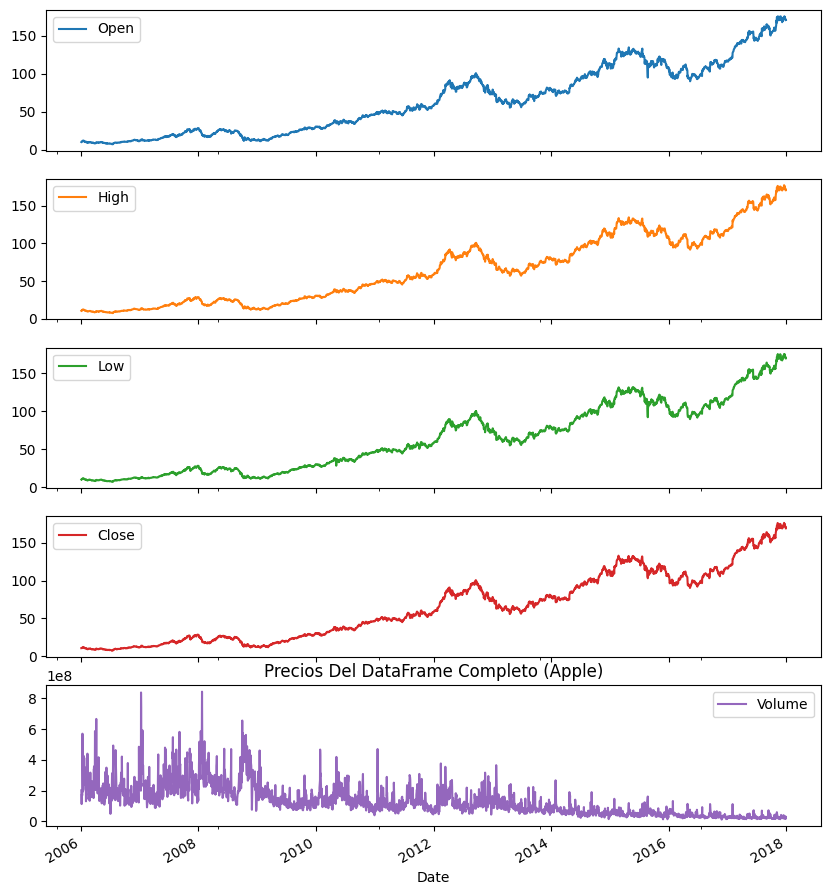

In [11]:
# Visualización básica de Apple
df_apple.plot(subplots=True, figsize=(10,12))
plt.title('Precios Del DataFrame Completo (Apple)')
plt.show()

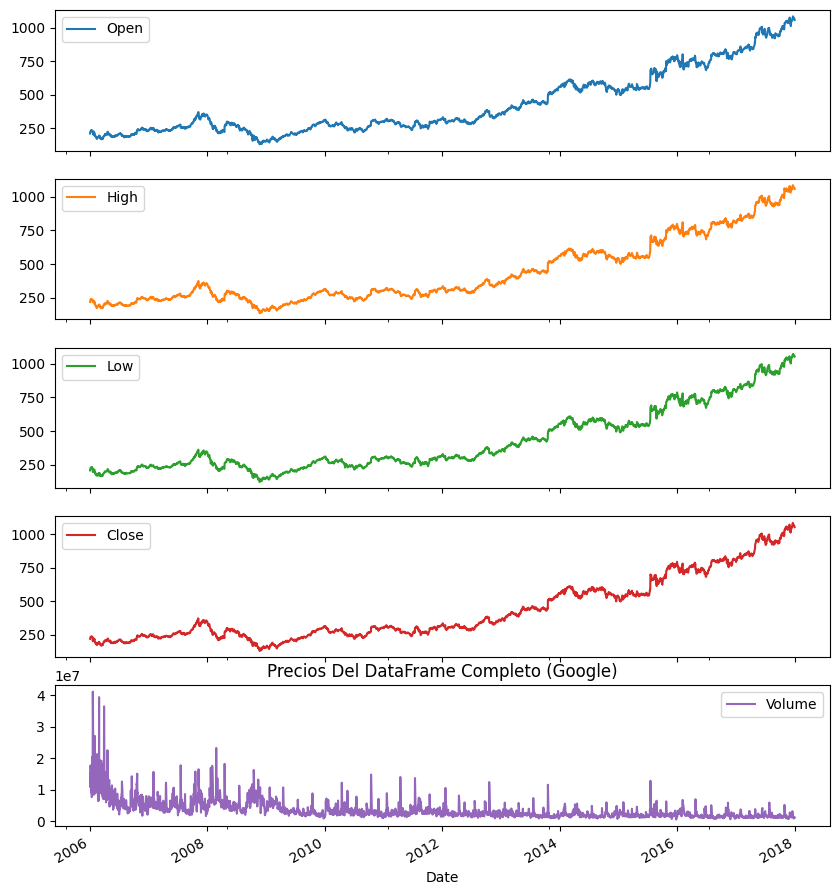

In [12]:
# Visualización básica de Apple
df_google.plot(subplots=True, figsize=(10,12))
plt.title('Precios Del DataFrame Completo (Google)')
plt.show()

---

#### *Rangos de datos, shifting y lags, resampling*

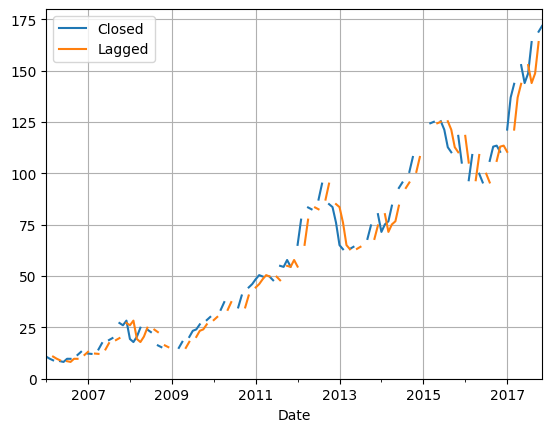

In [13]:
# Lag y shift aplicado al Dataframe Apple con dos meses

df_apple['Close'].asfreq('M').plot(legend=True)
lag = 2
shifted = df_apple['Close'].asfreq('M').shift(lag).plot(legend=True)
shifted.legend(['Closed', 'Lagged'])
plt.grid()
plt.show()

#### *Visualización de % Cambios y retornos.*

In [14]:
# Cambios

df_apple['Change'] = df_apple.Close.div(df_apple.Close.shift())
df_google['Change'] = df_google.Close.div(df_google.Close.shift())

In [15]:
# Retornos

df_apple['Return'] = df_apple.Change.sub(1).mul(100)
df_google['Return'] = df_apple.Change.sub(1).mul(100)

---

In [16]:
df_apple.head(10)

,Open,High,Low,Close,Volume,Name,Change,Return
Date,,,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL,NaN,NaN
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL,1.00,0.28
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL,0.99,-0.75
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL,1.03,2.54
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL,1.00,-0.37
2006-01-10,10.89,11.70,10.83,11.55,570088246,AAPL,1.06,6.35
2006-01-11,11.98,12.11,11.80,11.99,373548882,AAPL,1.04,3.81
2006-01-12,12.14,12.34,11.95,12.04,320201966,AAPL,1.00,0.42
2006-01-13,12.14,12.29,12.09,12.23,194153393,AAPL,1.02,1.58


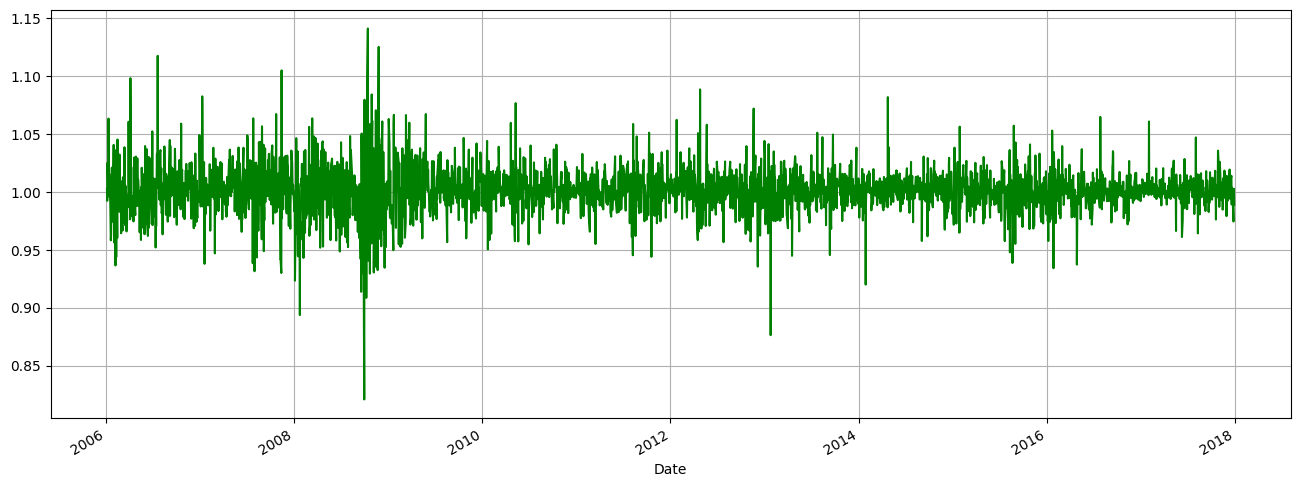

In [17]:
df_apple['Change'].plot(figsize=(16,6), color='green').grid()

---

In [18]:
df_google.head(10)

,Open,High,Low,Close,Volume,Name,Change,Return
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,NaN,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1.02,0.28
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,1.01,-0.75
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,1.03,2.54
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,1.00,-0.37
2006-01-10,232.44,235.36,231.25,235.11,9104719,GOOGL,1.01,6.35
2006-01-11,235.87,237.79,234.82,236.05,9008664,GOOGL,1.00,3.81
2006-01-12,237.10,237.73,230.98,232.05,10125212,GOOGL,0.98,0.42
2006-01-13,232.39,233.68,231.04,233.36,7660220,GOOGL,1.01,1.58


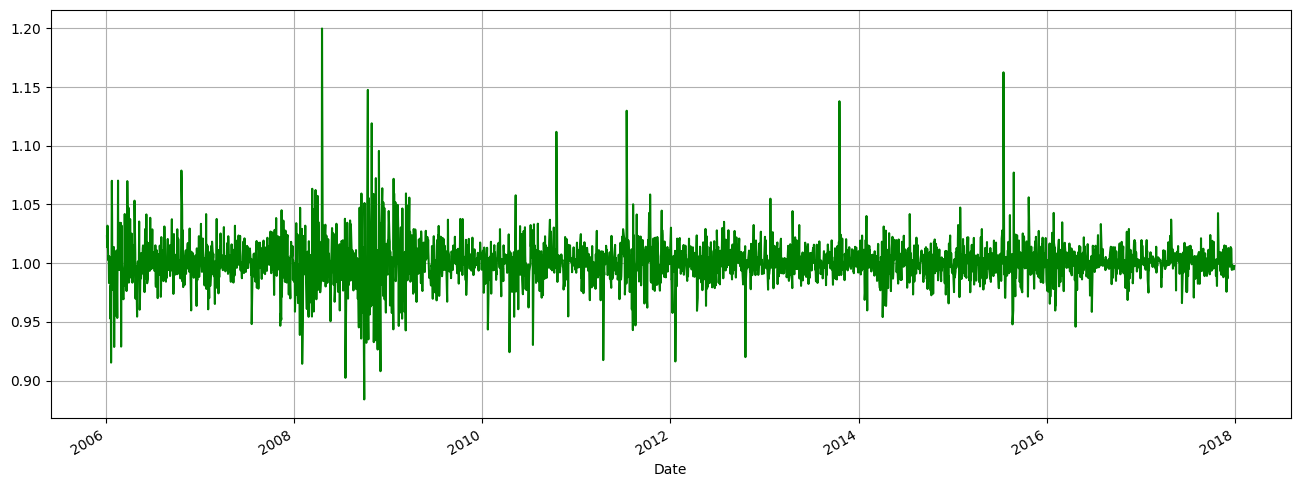

In [19]:
df_google['Change'].plot(figsize=(16,6), color='green').grid()

---

#### *Técnicas de comparación de series*

Text(0.5, 1.0, 'Comparación de precios Apple & Google')

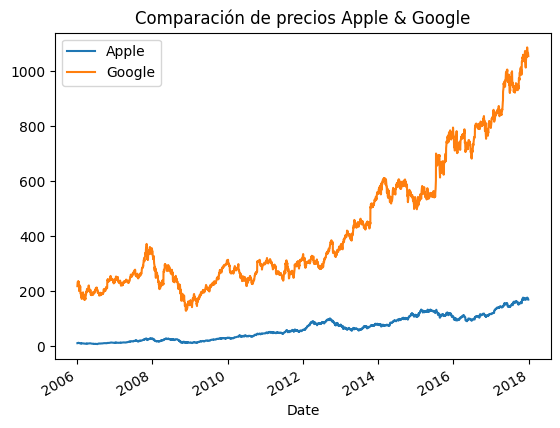

In [20]:
# Comparación de series pre-normalización

df_apple.Close.plot()
df_google.Close.plot()
plt.legend(['Apple', 'Google'])
plt.title('Comparación de precios Apple & Google')

---

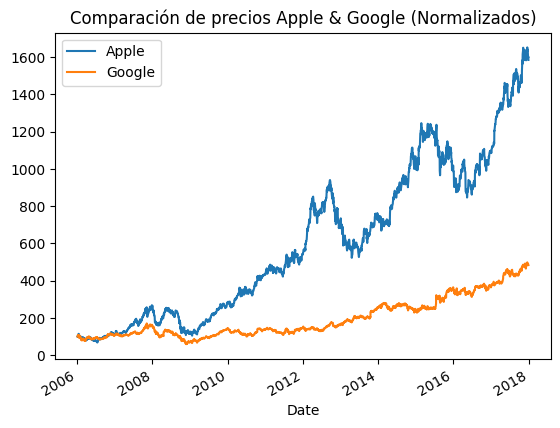

In [21]:
# Comparación de series post-normalización

normalize_apple = df_apple.Close.div(df_apple.Close.iloc[0]).mul(100)
normalize_google = df_google.Close.div(df_google.Close.iloc[0]).mul(100)

normalize_apple.plot()
normalize_google.plot()
plt.legend(['Apple', 'Google'])
plt.title('Comparación de precios Apple & Google (Normalizados)')
plt.show()

---

#### *Gráficos OHLC y Candlestick (Velas Japonesas)*

In [22]:
# Gráfico OHLC (Aplicado a Google)

rango_ohlc = go.Ohlc(x=df_google.index.astype(str),
                     open=df_google.Open,
                     high=df_google.High,
                     low=df_google.Low,
                     close=df_google.Close)

data = [rango_ohlc]
iplot(data)

___

In [23]:
# Gráfico Candlestick (Aplicado a Apple) / Enfocado a año 2010

rango_candle = go.Candlestick(x=df_apple['01-06-2010':'30-06-2010'].index,
                     open=df_apple['01-06-2010':'30-06-2010'].Open,
                     high=df_apple['01-06-2010':'30-06-2010'].High,
                     low=df_apple['01-06-2010':'30-06-2010'].Low,
                     close=df_apple['01-06-2010':'30-06-2010'].Close)

data = [rango_candle]
iplot(data)

---

#### *Descomposición de series*

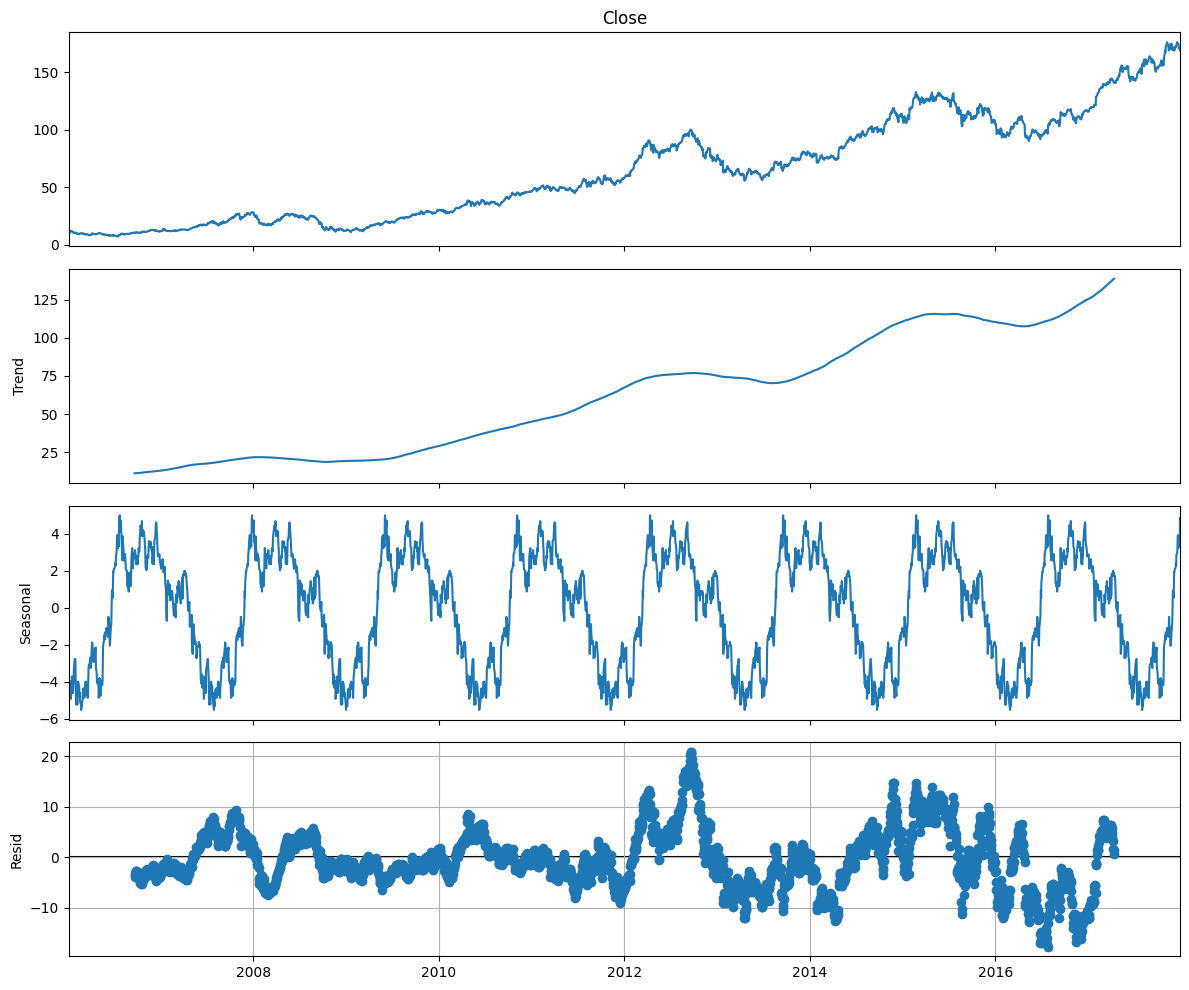

In [ ]:
# Descomposición de la serie temporal de Apple

rcParams['figure.figsize'] = 12,10

decomposed_apple = sm.tsa.seasonal_decompose(df_apple['Close'], period=360)

figure = decomposed_apple.plot()
plt.grid()
plt.show()

In [ ]:
# Descomposición de la serie temporal de Google

rcParams['figure.figsize'] = 12,10

decomposed_google = sm.tsa.seasonal_decompose(df_google['Close'], period=360)

figure = decomposed_apple.plot()
plt.grid()
plt.show()